# Progetto FAD 2020-2021

<b>L'obbiettivo del progetto è la costruzione di un modello per predizioni di match internazionali</b>


## Import libs and custom vars

Oltre alla domanda predittiva classifica le nazioni che sono più portate a vincere in casa rispetto a quella fuori casa (clustering)

Non allargarmi troppo

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from libs.utils import return_outcome, fix_continent_matches, extract_goals_per_year
from matplotlib import pyplot as plt
import datetime
from matplotlib.collections import LineCollection
import matplotlib.patches as mpatches
from os import path
import matplotlib.colors as mcolors

plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')

PATH_ORIGINAL_DST = 'dataset/original'
PATH_DST = 'dataset'

## Descrizione del dataset

Il Dataset contiene <b>42483</b> risultati di partite di calcio internazionale maschile. In particolare, sono incluse le partite ufficiali di varie le competizioni: dalle amichevoli alla coppa del mondo eccetto i Giochi Olimpici o le partite dove almeno una delle due squadre era la seconda squadra o U-23. Inoltre, il dataset presenta un ulteriore file che contiene <b>432</b> risultati di partite terminate con i calci di rigore, <u>che non sarà considerato</u>.

In [2]:
df = pd.read_csv(path.join(PATH_ORIGINAL_DST ,'results.csv') );

print("Null values:", df.isnull().values.any(), "| shape:", df.shape)
print("***"*15)
print(df.info())

Null values: False | shape: (42483, 9)
*********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42483 entries, 0 to 42482
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        42483 non-null  object
 1   home_team   42483 non-null  object
 2   away_team   42483 non-null  object
 3   home_score  42483 non-null  int64 
 4   away_score  42483 non-null  int64 
 5   tournament  42483 non-null  object
 6   city        42483 non-null  object
 7   country     42483 non-null  object
 8   neutral     42483 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB
None


## Pre-processing

- Colonna date formattata per ottenere più informazioni
- Inserita colonna 'outcome'
- Converto home_score e away_score in float
- Sistemo alcuni nomi del dataset, dato che sono presenti nomi di paesi/nazioni che sono cambiati durante il tempo. Non saranno considerati successivamente ma nella data visualization verranno utilizzati per non alterare troppo il dst

In [2]:
df = pd.read_csv(path.join(PATH_ORIGINAL_DST ,'results.csv') )

# necessario per dopo
df = df.astype({"home_score": float, "away_score": float})

df['outcome'] = None
df['day_of_week'] = None
df['day'] = None
df['month'] = None
df['year'] = None

counter = 0
for i in range(0, len(df)):
    counter = counter + 1
    print('*** Processing %d/%d ***' % (counter, len(df)), end='\r')

    # Uniformizzo nomi di squadre e continenti per standardizzarli al dataset FIFA utilizzato successivamente

    # --- Countries ----
    if(df.loc[i]['country'] == 'United States'):
        df.at[i, 'country'] = 'USA'
    elif(df.loc[i]['country'] == 'Ivory Coast'):
        df.at[i, 'country'] = "Côte d'Ivoire"
    elif(df.loc[i]['country'] == 'Cape Verde'):
        df.at[i, 'country'] = 'Cabo Verde'
    elif(df.loc[i]['country'] == 'DR Congo'):
        df.at[i, 'country'] = 'Congo DR'
    elif(df.loc[i]['country'] == 'Iran'):
        df.at[i, 'country'] = 'IR Iran'
    elif(df.loc[i]['country'] == 'North Korea'):
        df.at[i, 'country'] = 'Korea DPR'
    elif(df.loc[i]['country'] == 'Saint Lucia'):
        df.at[i, 'country'] = 'St. Lucia'
    elif(df.loc[i]['country'] == 'Saint Vincent and the Grenadines'):
        df.at[i, 'country'] = 'St. Vincent / Grenadines'
    elif(df.loc[i]['country'] == 'South Korea'):
        df.at[i, 'country'] = 'Korea Republic'
    elif(df.loc[i]['country'] == 'United States Virgin Islands'):
        df.at[i, 'country'] = 'US Virgin Islands'
    elif(df.loc[i]['country'] == 'Saint Kitts and Nevis'):
        df.at[i, 'country'] = 'St. Kitts and Nevis'

    # ---- Home teams ------
    if(df.loc[i]['home_team'] == 'United States'):
        df.at[i, 'home_team'] = 'USA'
    elif(df.loc[i]['home_team'] == 'Ivory Coast'):
        df.at[i, 'home_team'] = "Côte d'Ivoire"
    elif(df.loc[i]['home_team'] == 'Cape Verde'):
        df.at[i, 'home_team'] = 'Cabo Verde'
    elif(df.loc[i]['home_team'] == 'DR Congo'):
        df.at[i, 'home_team'] = 'Congo DR'
    elif(df.loc[i]['home_team'] == 'Iran'):
        df.at[i, 'home_team'] = 'IR Iran'
    elif(df.loc[i]['home_team'] == 'North Korea'):
        df.at[i, 'home_team'] = 'Korea DPR'
    elif(df.loc[i]['home_team'] == 'Saint Lucia'):
        df.at[i, 'home_team'] = 'St. Lucia'
    elif(df.loc[i]['home_team'] == 'Saint Vincent and the Grenadines'):
        df.at[i, 'home_team'] = 'St. Vincent / Grenadines'
    elif(df.loc[i]['home_team'] == 'South Korea'):
        df.at[i, 'home_team'] = 'Korea Republic'
    elif(df.loc[i]['home_team'] == 'Saint Kitts and Nevis'):
        df.at[i, 'home_team'] = 'St. Kitts and Nevis'
    elif(df.loc[i]['home_team'] == 'United States Virgin Islands'):
        df.at[i, 'home_team'] = 'US Virgin Islands'


    # ---- Away teams ------
    if(df.loc[i]['away_team'] == 'United States'):
        df.at[i, 'away_team'] = 'USA'
    elif(df.loc[i]['away_team'] == 'Ivory Coast'):
        df.at[i, 'away_team'] = "Côte d'Ivoire"
    elif(df.loc[i]['away_team'] == 'Cape Verde'):
        df.at[i, 'away_team'] = 'Cabo Verde'
    elif(df.loc[i]['away_team'] == 'DR Congo'):
        df.at[i, 'away_team'] = 'Congo DR'
    elif(df.loc[i]['away_team'] == 'Iran'):
        df.at[i, 'away_team'] = 'IR Iran'
    elif(df.loc[i]['away_team'] == 'North Korea'):
        df.at[i, 'away_team'] = 'Korea DPR'
    elif(df.loc[i]['away_team'] == 'Saint Lucia'):
        df.at[i, 'away_team'] = 'St. Lucia'
    elif(df.loc[i]['away_team'] == 'Saint Vincent and the Grenadines'):
        df.at[i, 'away_team'] = 'St. Vincent / Grenadines'
    elif(df.loc[i]['country'] == 'Saint Kitts and Nevis'):
        df.at[i, 'country'] = 'St. Kitts and Nevis'
    elif(df.loc[i]['away_team'] == 'South Korea'):
        df.at[i, 'away_team'] = 'Korea Republic'
    elif(df.loc[i]['away_team'] == 'United States Virgin Islands'):
        df.at[i, 'away_team'] = 'US Virgin Islands'


    # Estraggo i campi della colonna 'date'
    row_date = datetime.date.fromisoformat(df.iloc[i]['date'])
    df.at[i, 'day'] = row_date.strftime('%d')
    df.at[i, 'day_of_week'] = row_date.strftime('%A')
    df.at[i, 'month'] = row_date.strftime('%B')
    df.at[i, 'year'] = int(row_date.strftime('%Y'))

    # Calcolo il risultato della partita
    df.at[i, 'outcome'] = return_outcome(df.iloc[i]['home_score'], df.iloc[i]['away_score'])

    # Calcolo il risultato della partita dopo i calci di rigore -- NON NECESSARIO
    # df_shootouts = pd.read_csv(path.join(PATH_ORIGINAL_DST, 'shootouts.csv')
    # if(df.iloc[i]['outcome'] == 'D'):
        # df.at[i, 'outcome'] = find_penalty(df.iloc[i], df_shootouts, df_shootouts.__len__() - 1)

# drop di 'date' perché ridondante
df.drop(labels=['date'], axis=1, inplace=True)
df.to_csv(path.join(PATH_DST, 'dataset_complete.csv'))
# effettuo il drop delle collonne non utilizzate nell'analisi descrittiva, ma le calcolo comunque per completezza e salvo due copie diverse
df.drop(labels=['month', 'day_of_week', 'day' , 'city'], axis=1, inplace=True)
df.to_csv(path.join(PATH_DST, 'dataset_reduced.csv'))

## Statistica descrittiva - Distribuzione dei dati

In [ ]:
df = pd.read_csv(path.join(PATH_DST, 'dataset_reduced.csv'))
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

df.head()

Descrizione del dataset
1. <s>Numero di partie per anno</s>
2. <s>Numero di partie per anno per contiente</s> ---> Approssimazione a CMF/PMF ???
3. <s> Numero di goal per anno (? / scatterplot) </s>
4. Numero di vittorie (scatterplot)
    - Giocare in casa influenza le vittorie? Controlla se ci c'è correllazione tra vincere/perdere in casa o no
    - Migliore team (per attacco e difesa) per decade

### Competizioni presenti nel dataset

Considero solo le prime 15.

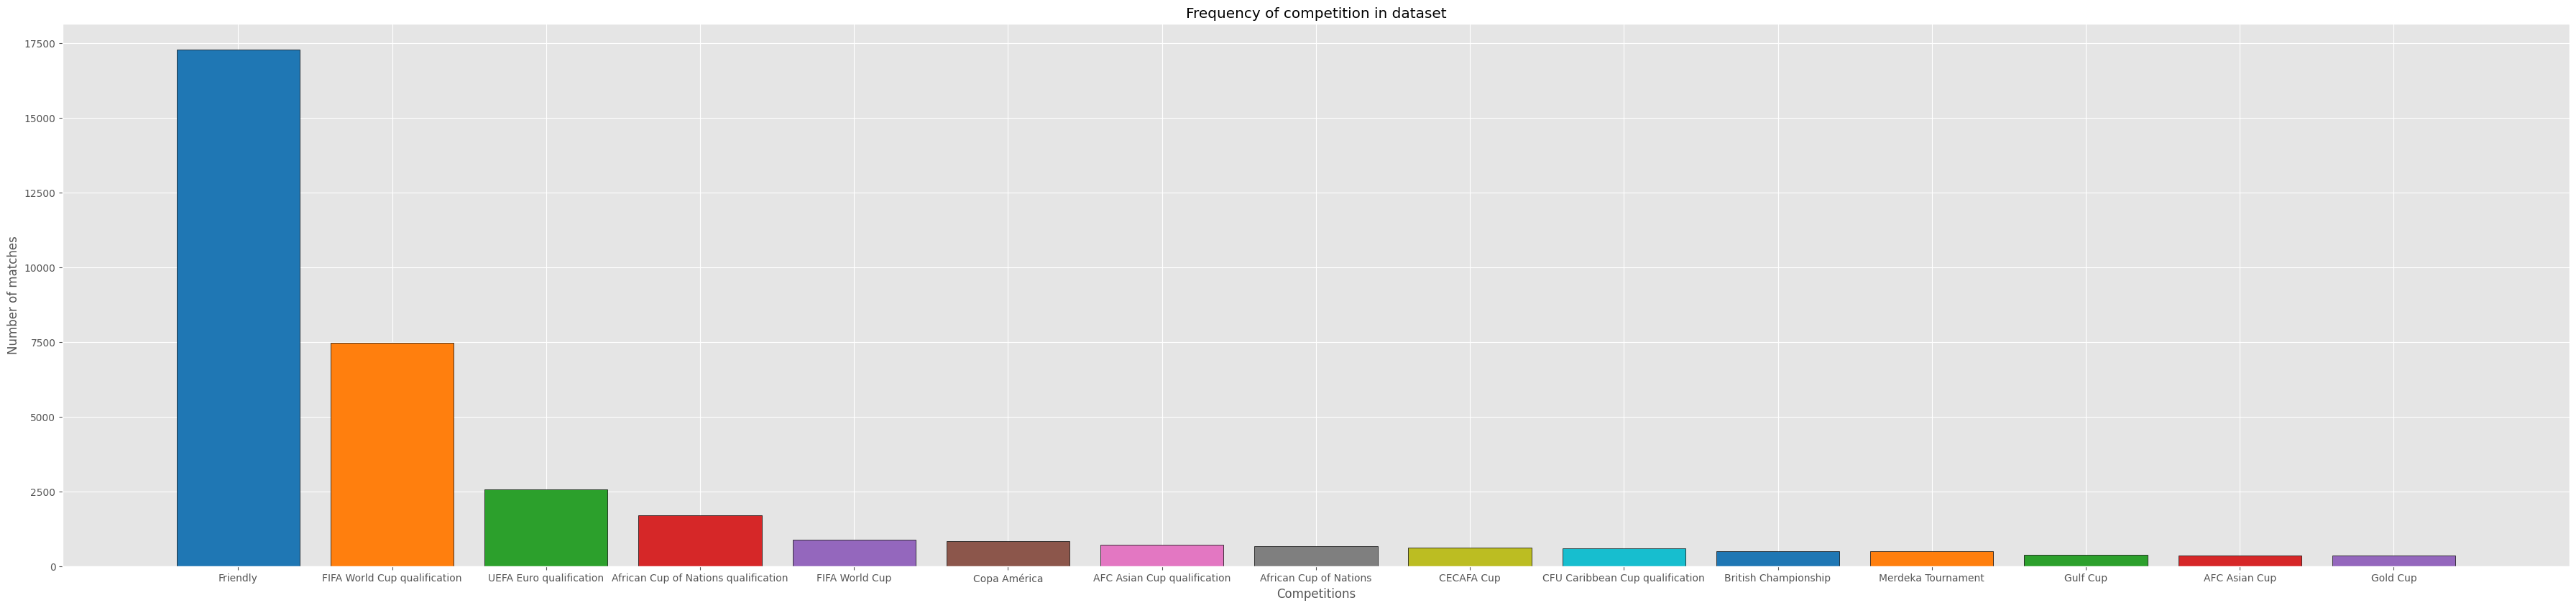

In [21]:
tournaments = df['tournament'].value_counts()

plt.rcParams.update({'figure.figsize':(45,10), 'figure.dpi':100})
plt.title('Frequency of competition in dataset')
plt.ylabel('Number of matches')
plt.xlabel('Competitions')
plt.bar(tournaments.index[:15], tournaments.values[:15], color=[i for i in mcolors.TABLEAU_COLORS], edgecolor='black')

plt.show()

### Numero di partite disputate per anno:

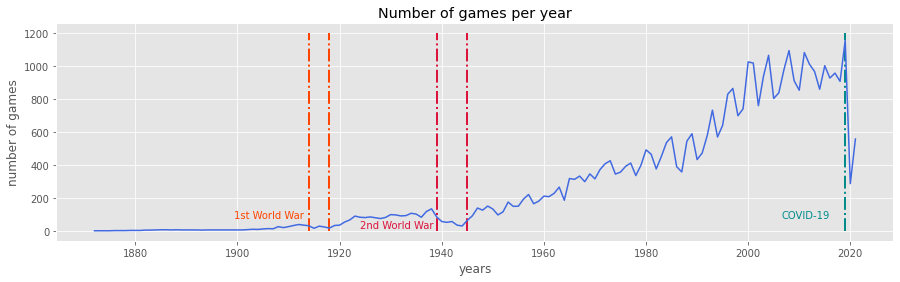

In [4]:
df = pd.read_csv(path.join(PATH_DST, 'dataset_reduced.csv'))
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

# matches per year
mpy = df['year'].value_counts().sort_index()

plt.figure(figsize=(15,4))
plt.title(label='Number of games per year')
plt.ylabel(ylabel='number of games')
plt.xlabel(xlabel='years')

l1 = [(1914,0), (1914,1200)]
l2 = [(1918,0), (1918,1200)]
l3 = [(1939,0), (1939,1200)]
l4 = [(1945,0), (1945,1200)]
l5 = [(2019,0), (2019, 1200)]

lc = LineCollection([l1, l2, l3, l4, l5], color=["orangered","orangered", "crimson","crimson", "darkcyan"], lw=2, linestyles='-.')

plt.annotate('1st World War', xy=(1914, 200), xycoords='data', ha='center', xytext=(-40, -20), textcoords='offset points', color='orangered')
plt.annotate('2nd World War', xy=(1939, 200), xycoords='data', ha='center', xytext=(-40, -30), textcoords='offset points', color='crimson')
plt.annotate('COVID-19', xy=(2019, 200), xycoords='data', ha='center', xytext=(-40, -20), textcoords='offset points', color='darkcyan')

plt.gca().add_collection(lc)

plt.plot(mpy, color='royalblue')
plt.grid(True)
plt.show()

### Numero di partite giocate per anno da ogni continente
Dal dataset FIFA carico le confederazioni delle nazionali. Ricavo dunque i continenti in cui è stato disputato il match

In [5]:
df = pd.read_csv(path.join(PATH_DST, 'dataset_reduced.csv'))
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

# continente in cui è stato disputato il match
df['continent'] = ''

# mi ricavo le confederazioni delle nazionali dal dataset FIFA
df_fifa = pd.read_csv(path.join(PATH_ORIGINAL_DST,'fifa_ranking-2021-05-27.csv'))
df_fifa.drop(labels=['rank', 'rank_date', 'rank_change', 'total_points', 'previous_points', 'id'], axis=1, inplace=True)
df_fifa.drop_duplicates(subset="country_full", keep="first", inplace=True)

# so già a prescindere che ci saranno delle nazioni non riconosciute
df_nocontinent_found = pd.DataFrame(columns=df.columns)

index_mismatches_dst = []

for i in range(0, len(df)):
    if( df_fifa[(df_fifa.country_full == df.iloc[i]['country'])]['confederation'].values.__len__() == 1 ):
        confederation = df_fifa[(df_fifa.country_full == df.iloc[i]['country'])]['confederation'].values[0]
        
        if confederation in "CONCACAF":
            continent = "America"

        if confederation in "CONMEBOL":
            continent = "America"

        if confederation == "UEFA":
            continent = "Europe"

        if(confederation == "AFC"):
            continent = "Asia"
        
        if(confederation == "CAF"):
            continent = "Africa"

        if(confederation == "OFC"):
            continent = "Oceania"

        df.at[i, 'continent'] = continent
    else:
            current = df.iloc[i]['country']

            if (current == 'Bohemia'
                    or current == 'Soviet Union'
                    or current == 'Irish Free State'
                    or current == 'German DR'
                    or current == 'Saarland'
                    or current == 'Jersey'
                    or current == 'Northern Cyprus'
                    or current == 'Isle of Man'
                    or current == 'Guernsey'
                    or current == 'Bohemia and Moravia'
                    or current == 'Monaco' ):
                df.at[i, 'continent'] = 'Europe'

            elif (current == 'British Guyana'
                    or current == 'Netherlands Guyana'
                    or current == 'French Guiana'
                    or current == 'Saint Kitts and Nevis'
                    or current == 'Éire'
                    or current == 'Guadeloupe'
                    or current == 'Martinique'
                    or current == 'Saint Martin'
                    or current == 'United States Virgin Islands'
                    or current == 'Sint Maarten'
                    or current == 'Greenland' ):
                df.at[i, 'continent'] = 'America'

            elif (current == 'Manchuria'
                    or current == 'Ceylon'
                    or current == 'Burma'
                    or current == 'Malaya'
                    or current == 'Vietnam Republic'
                    or current == 'United Arab Republic'
                    or current == 'Vietnam DR'
                    or current == 'Taiwan'
                    or current == 'Kyrgyzstan'
                    or current == 'East Timor'
                    or current == 'Brunei'
                    or current == 'Yemen DPR'
                    or current == 'Yemen AR' ):
                df.at[i, 'continent'] = 'Asia'

            elif (current == 'Northern Rhodesia'
                    or current == 'Tanganyika'
                    or current == 'French Somaliland'
                    or current == 'Belgian Congo'
                    or current == 'Southern Rhodesia'
                    or current == 'Réunion'
                    or current == 'Zanzibar' 
                    or current == 'Gold Coast'
                    or current == 'Nyasaland'
                    or current == 'Dahomey'
                    or current == 'Mali Federation'
                    or current == 'Upper Volta'
                    or current == 'Eswatini'
                    or current == 'Zaïre'
                    or current == 'Mayotte'
                    or current == 'Portuguese Guinea'
                    or current == 'Rhodesia' ):
                df.at[i, 'continent'] = 'Africa'

            elif (df.iloc[i]['country'] == 'French Polynesia'
                    or current == 'New Hebrides'
                    or current == 'Lautoka'
                    or current == 'Northern Mariana Islands'
                    or current == 'Micronesia'
                    or current == 'Palau'
                    or current == 'Western Samoa' ):
                df.at[i, 'continent'] = 'Oceania'

            else:
                print("Exception at row: %d" % i)
                df_nocontinent_found = df_nocontinent_found.append(df.iloc[i])


if(df_nocontinent_found.__len__() == 0):
    print("All rows are correctly updated")
else:
    # per analizzare meglio salvo il csv
    df_nocontinent_found.to_csv('output.csv')


# salvo per evitare di doverlo ricreare se faccio errori
df.to_csv(path.join(PATH_DST, 'dataset_continent.csv'))

All rows are correctly updated


In [ ]:
df = pd.read_csv(path.join(PATH_DST, 'dataset_continent.csv'))
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# dataframe continent reduced
df_cr = df.groupby(['continent','year']).size().to_csv('output.csv') # risolvo il problema del groupby che non scrive nelle colonne i continenti
df_cr = pd.read_csv('output.csv')

df_cr.sort_values(by='year', axis=0, inplace=True)
df_cr = df_cr.reset_index().drop(columns=['index']).rename(columns={'0': 'matches'})

if df.__len__() == df_cr['matches'].sum():
    print("Groupby eseguito correttamente")

years = df_cr['year'].drop_duplicates().to_numpy()

africa = df_cr[df_cr['continent'] == 'Africa' ].reset_index().drop(columns=['continent', 'index'])
america = df_cr[df_cr['continent'] == 'America'].reset_index().drop(columns=['continent', 'index'])
asia = df_cr[df_cr['continent'] == 'Asia'].reset_index().drop(columns=['continent', 'index'])
europe = df_cr[df_cr['continent'] == 'Europe'].reset_index().drop(columns=['continent', 'index'])
oceania = df_cr[df_cr['continent'] == 'Oceania'].reset_index().drop(columns=['continent', 'index'])


print("First appearance in national match:\nAfrica: %d\nAmerica: %d\nAsia: %d\nEurope: %d\nOceania: %d" % (africa['year'].min(), america['year'].min(), asia['year'].min(), europe['year'].min(), oceania['year'].min() ))
africa  =  fix_continent_matches(years, africa)
america =  fix_continent_matches(years, america)
asia     = fix_continent_matches(years, asia)
europe  =  fix_continent_matches(years, europe)
oceania =  fix_continent_matches(years, oceania)

if (len(africa) == len(europe) == len(america) == len(oceania) == len(asia) ):
    print("All df have the same number of rows")

Groupby eseguito correttamente
First appearance in national match:
Africa: 1926
America: 1885
Asia: 1917
Europe: 1872
Oceania: 1922
All df have the same number of rows


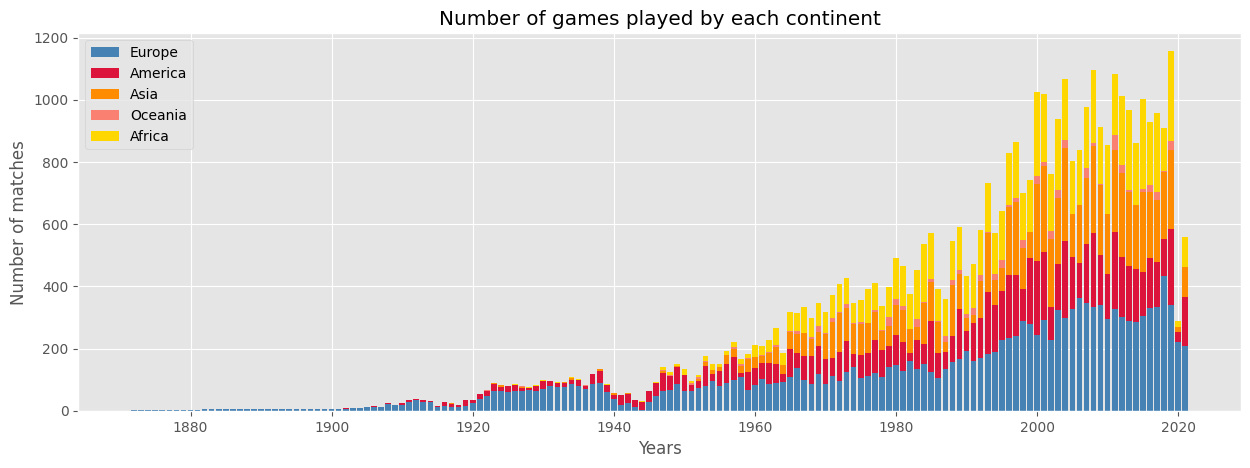

In [7]:
plt.rcParams.update({'figure.figsize':(15,5), 'figure.dpi':100})
plt.title('Number of games played by each continent')
plt.ylabel('Number of matches')
plt.xlabel('Years')
plt.bar(years, europe.matches.values, color='steelblue')
plt.bar(years, america.matches.values, bottom=europe.matches.values , color='crimson')
plt.bar(years, asia.matches.values, bottom = europe.matches.values+america.matches.values, color='darkorange')
plt.bar(years, oceania.matches.values, bottom = europe.matches.values+america.matches.values+asia.matches.values , color='salmon')
plt.bar(years, africa.matches.values, bottom=europe.matches.values + america.matches.values + asia.matches.values + oceania.matches.values, color='gold')
plt.legend(['Europe', 'America', 'Asia', 'Oceania', 'Africa'])

plt.show()

### Numero di goal per anno, divisi per continente

Effettuo una distinzione tra le partite giocate in campo neutrale e quelle giocate in campo non neutrale (la squadra di casa è gioca effettivamente in casa)

In [8]:
df = pd.read_csv(path.join(PATH_DST, 'dataset_reduced.csv'))
df.drop(labels=['Unnamed: 0', 'country'], axis=1, inplace=True)

df_c = pd.read_csv(path.join(PATH_DST, 'dataset_continent.csv'))
df_c.drop(labels=['Unnamed: 0', 'country'], axis=1, inplace=True)

# neutral games
df_c_ng = df_c[df_c['neutral'] == True]
# not neutral games
df_c_nng = df_c[df_c['neutral'] == False]

df_c_ng.reset_index(inplace=True)
df_c_nng.reset_index(inplace=True)

df_c_ng = df_c_ng.drop(labels=['index'], axis=1)
df_c_nng = df_c_nng.drop(labels=['index'], axis=1)

years = df['year'].drop_duplicates().to_numpy()
continents = ['Africa', 'America', 'Asia', 'Europe', 'Oceania']

#games per continent neutral games
gpc_ng = {
    'Africa': pd.DataFrame(),
    'America': pd.DataFrame(),
    'Asia': pd.DataFrame(),
    'Europe': pd.DataFrame(),
    'Oceania': pd.DataFrame()
}

#games per continent not neutral games
gpc_nng = gpc_ng.copy()

# neutral games
for i in continents:
    df = df_c_ng[df_c_ng['continent'] == i].reset_index().drop(columns=['continent', 'index'])
    gpc_ng[i] = extract_goals_per_year(years, df)
    gpc_ng[i] = gpc_ng[i][gpc_ng[i].loc[:]!=0].dropna()
    gpc_ng[i].reset_index(inplace=True)
    gpc_ng[i] = gpc_ng[i].drop(labels=['index'], axis=1)

df = pd.DataFrame()

# not neutral games
for i in continents:
    df = df_c_nng[df_c_nng['continent'] == i].reset_index().drop(columns=['continent', 'index'])
    gpc_nng[i] = extract_goals_per_year(years, df)
    gpc_nng[i] = gpc_nng[i][gpc_nng[i].loc[:]!=0].dropna()
    gpc_nng[i].reset_index(inplace=True)
    gpc_nng[i] = gpc_nng[i].drop(labels=['index'], axis=1)

Divido il dataset in due parti:
- Le partite in campo neutrale: hg e ag hanno differenza semplicemente per distinguere il risultato tra le due squadre
- Le partite in campo non neutrale: abbiamo una differenza tra goal di squadre che giocavano in casa e quanto hanno subito

In [9]:
gpc_nng['Europe'].describe()

,year,n_matches,hg,ag,tot
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,1947.479730,89.608108,162.290541,111.493243,273.783784
std,42.902749,82.205536,129.330524,88.643941,217.007149
min,1873.000000,1.000000,1.000000,1.000000,3.000000
25%,1910.750000,13.000000,31.250000,22.750000,53.750000
50%,1947.500000,72.000000,168.000000,113.000000,286.000000
75%,1984.250000,131.000000,218.750000,149.000000,352.000000
max,2021.000000,297.000000,553.000000,394.000000,947.000000


In [10]:
gpc_ng['Europe'].describe()

,year,n_matches,hg,ag,tot
count,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1977.026316,28.750000,45.263158,40.802632,86.065789
std,30.335446,33.281076,50.970676,45.838272,95.420101
min,1890.000000,1.000000,1.000000,1.000000,2.000000
25%,1955.500000,4.000000,5.750000,5.000000,12.000000
50%,1981.500000,16.000000,25.500000,20.500000,46.000000
75%,2002.250000,44.500000,75.000000,62.750000,146.250000
max,2021.000000,163.000000,240.000000,188.000000,428.000000


In [11]:
gpc_nng['Europe'].tail()

,year,n_matches,hg,ag,tot
143,2017,252,444.0,272.0,716.0
144,2018,270,411.0,283.0,694.0
145,2019,297,553.0,394.0,947.0
146,2020,199,290.0,201.0,491.0
147,2021,158,277.0,170.0,447.0


In [12]:
gpc_ng['Europe'].tail()

,year,n_matches,hg,ag,tot
71,2017,81.0,118.0,142.0,260.0
72,2018,163.0,240.0,188.0,428.0
73,2019,43.0,89.0,65.0,154.0
74,2020,23.0,30.0,26.0,56.0
75,2021,50.0,58.0,74.0,132.0


In [13]:
continents = ['Africa', 'America', 'Asia', 'Europe', 'Oceania']
colors = ['coral', 'darkgoldenrod', 'dodgerblue', 'lightgreen', 'pink']

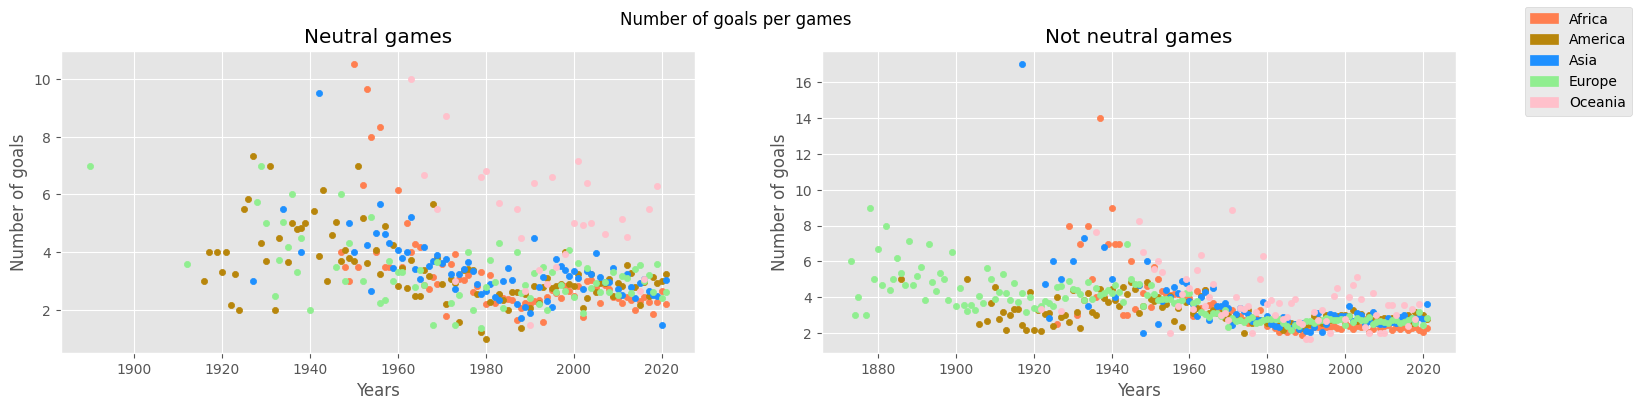

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(18,4))

fig.suptitle('Number of goals per games')

axs[0].set_title('Neutral games')
axs[0].set_ylabel('Number of goals')
axs[0].set_xlabel('Years')

axs[1].set_title('Not neutral games')
axs[1].set_ylabel('Number of goals')
axs[1].set_xlabel('Years')

for i in range(0,5):
    axs[0].scatter(
        x=gpc_ng[continents[i]].year,
        y=gpc_ng[continents[i]].tot / gpc_ng[continents[i]].n_matches,
        c=colors[i],
        s=20
    )

    axs[1].scatter(
        x=gpc_nng[continents[i]].year,
        y=gpc_nng[continents[i]].tot / gpc_nng[continents[i]].n_matches,
        c=colors[i],
        s=20
    )

fig.legend(handles=[mpatches.Patch(color='coral', label='Africa'),
                    mpatches.Patch(color='darkgoldenrod', label='America'),
                    mpatches.Patch(color='dodgerblue', label='Asia'),
                    mpatches.Patch(color='lightgreen', label='Europe'),
                    mpatches.Patch(color='pink', label='Oceania')
                    ])


plt.show()

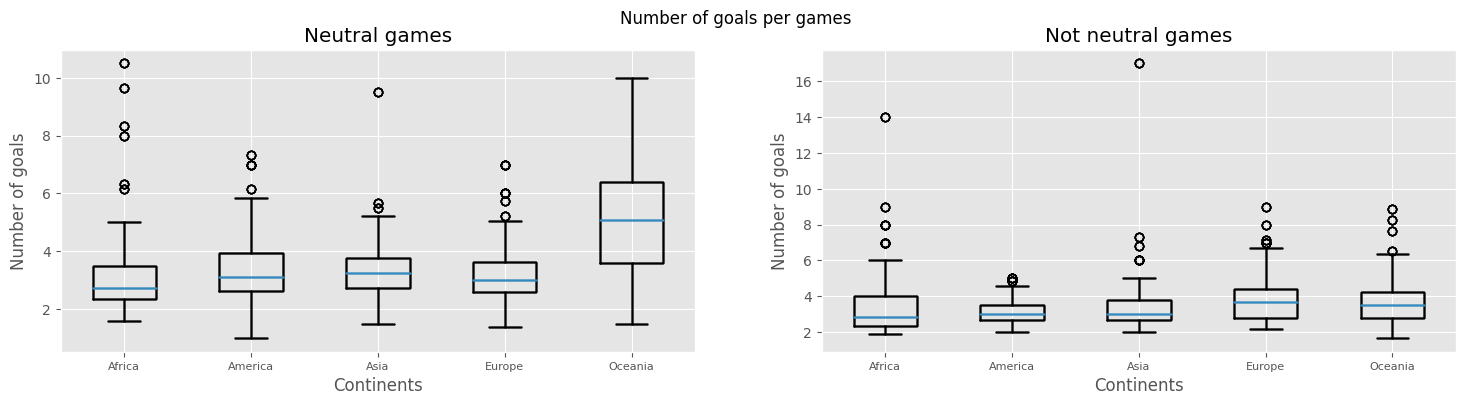

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(18,4))

fig.suptitle('Number of goals per games')

axs[0].set_title('Neutral games')
axs[0].set_ylabel('Number of goals')
axs[0].set_xlabel('Continents')

axs[1].set_title('Not neutral games')
axs[1].set_ylabel('Number of goals')
axs[1].set_xlabel('Continents')

for i in range(0,5):
    axs[0].boxplot([gpc_ng['Africa']['tot'] / gpc_ng['Africa'].n_matches, gpc_ng['America']['tot'] / gpc_ng['America'].n_matches, gpc_ng['Asia']['tot'] / gpc_ng['Asia'].n_matches, gpc_ng['Europe']['tot'] / gpc_ng['Europe'].n_matches, gpc_ng['Oceania']['tot'] / gpc_ng['Oceania'].n_matches])
    axs[1].boxplot([gpc_nng['Africa']['tot'] / gpc_nng['Africa'].n_matches, gpc_nng['America']['tot'] / gpc_nng['America'].n_matches, gpc_nng['Asia']['tot'] / gpc_nng['Asia'].n_matches, gpc_nng['Europe']['tot'] / gpc_nng['Europe'].n_matches, gpc_nng['Oceania']['tot'] / gpc_nng['Oceania'].n_matches])

for i in range(0,2):
    axs[i].set_xticks([1, 2, 3, 4, 5]) 
    axs[i].set_xticklabels(['Africa', 'America', 'Asia', 'Europe', 'Oceania'], fontsize=8)

plt.show()

Si evince dal boxplot che in campo neutrale si segnano più goal rispetto a una partita giocata in campo non neutrale.

### Best teams during histories
- Best attacking teams
- Best defence teams

In [2]:
df = pd.read_csv(path.join(PATH_DST, 'dataset_reduced.csv'))
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

# creo una copia che servirà successivamente
df_ = df.copy()

# neutral games
df['neutral_games_matches'] = 0
df['ng_wins'] = 0
df['ng_defeats'] = 0
df['ng_draws'] = 0
df['ng_goal_scored'] = 0
df['ng_goal_conceded'] = 0

# not neutral games

# When play at home
df['home_matches'] = 0
df['home_wins'] = 0
df['home_defeats'] = 0
df['home_draws'] = 0
df['home_goal_scored'] = 0
df['home_goal_conceded'] = 0

# when play away
df['away_matches'] = 0
df['away_wins'] = 0
df['away_defeats'] = 0
df['away_draws'] = 0
df['away_goal_scored'] = 0
df['away_goal_conceded'] = 0


df_fifa = pd.read_csv(path.join(PATH_ORIGINAL_DST, 'fifa_ranking-2021-05-27.csv'))
df_fifa.drop(labels=['rank', 'rank_date', 'rank_change', 'total_points', 'previous_points', 'id'], axis=1, inplace=True)
df_fifa.drop_duplicates(subset="country_full", keep="first", inplace=True)

df_ht = df['home_team'].drop_duplicates().sort_values().reset_index().drop(labels=['index'], axis=1)
df_at = df['away_team'].drop_duplicates().sort_values().reset_index().drop(labels=['index'], axis=1)

df_ht = df_ht.rename(columns={'home_team': 'team'})
df_at = df_at.rename(columns={'away_team': 'team'})

if (df_ht.__len__() != df_at.__len__()):
    print("Not same length! Some mismatch")

    # find elements in df_ht that are not in df_at
    df = pd.concat([df_ht,df_at]).drop_duplicates().sort_values(by='team').reset_index().drop(labels=['index'], axis=1)

    df['confederation'] = ''

    for i in df['team']:
        if(df_fifa[ df_fifa['country_full'] == i]['confederation'].values[:].size == 1):
            df.at[df['team'] == i, 'confederation'] = df_fifa[ df_fifa['country_full'] == i]['confederation'].values[:]

    df.replace("", np.nan, inplace=True)
    # drop delle squadre non presenti nel dataset fifa
    df.dropna(subset = ['confederation'], inplace=True)
    df.drop(labels=['confederation'], axis=1, inplace=True)

    print("... Fixed !")

for i in df.team:

    # ----- neutral games ----------
    neutral_games = df_.query('neutral == True and home_team == @i or neutral == True and away_team == @i')

    # all matches played in neutral field SELECTED BY i
    df.at[df['team'] == i, 'neutral_games_matches'] = len(neutral_games)
    df.at[df['team'] == i, 'ng_wins'] = len( neutral_games.query('home_team == @i and outcome == "Home" or away_team == @i and outcome == "Away" ') )
    df.at[df['team'] == i, 'ng_defeats'] = len( neutral_games.query('home_team == @i and outcome == "Away" or away_team == @i and outcome == "Home" ') )
    df.at[df['team'] == i, 'ng_draws'] = len( neutral_games.query('home_team == @i and outcome == "Draw" or away_team == @i and outcome == "Draw" ') )
    df.at[df['team'] == i, 'ng_goal_scored'] = neutral_games.query('home_team == @i')['home_score'].sum() + neutral_games.query('away_team == @i')['away_score'].sum()
    df.at[df['team'] == i, 'ng_goal_conceded'] = neutral_games.query('home_team != @i')['home_score'].sum() + neutral_games.query('away_team != @i')['away_score'].sum()


    # ------- not neutral games --------
    nn_games = df_.query('neutral == False and home_team == @i or neutral == False and away_team == @i')

    home_matches = nn_games.query('home_team == @i')

    # When play at home
    df.at[df['team'] == i,'home_matches'] = len( home_matches )
    df.at[df['team'] == i,'home_wins'] = len( home_matches.query('outcome == "Home"') )
    df.at[df['team'] == i,'home_defeats'] = len( home_matches.query('outcome == "Away"') )
    df.at[df['team'] == i,'home_draws'] = len( home_matches.query('outcome == "Draw" ') )

    df.at[df['team'] == i, 'home_goal_scored'] = home_matches['home_score'].sum()
    df.at[df['team'] == i, 'home_goal_conceded'] = home_matches['away_score'].sum()



    away_matches = nn_games.query('away_team == @i')

    # when play away
    df.at[df['team'] == i, 'away_matches'] = len(away_matches)
    df.at[df['team'] == i, 'away_wins'] = len( away_matches.query('outcome == "Away"') )
    df.at[df['team'] == i, 'away_defeats'] = len( away_matches.query('outcome == "Home"') )
    df.at[df['team'] == i, 'away_draws'] = len( away_matches.query('outcome == "Draw"') )
    df.at[df['team'] == i, 'away_goal_scored'] = away_matches['away_score'].sum()
    df.at[df['team'] == i, 'away_goal_conceded'] = away_matches['home_score'].sum()

df.to_csv(path.join(PATH_DST, 'dataset_teams_performance_detail.csv'))

Not same length! Some mismatch
... Fixed !


In [3]:
df = pd.read_csv(path.join(PATH_DST, 'dataset_teams_performance_detail.csv') )
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

df_ = pd.DataFrame()

df_['team'] = df['team']

for i in df_.team:
    df_.at[df_.team == i, 'matches'] = df[df.team == i]['neutral_games_matches'] + df[df.team == i]['home_matches'] + df[df.team == i]['away_matches'] 
    df_.at[df_.team == i, 'wins'] = df[df.team == i]['ng_wins'] + df[df.team == i]['home_wins'] + df[df.team == i]['away_wins']
    df_.at[df_.team == i, 'defeats'] = df[df.team == i]['ng_defeats'] + df[df.team == i]['home_defeats'] + df[df.team == i]['away_defeats']
    df_.at[df_.team == i, 'draws'] = df[df.team == i]['ng_draws'] + df[df.team == i]['home_draws'] + df[df.team == i]['away_draws']
    df_.at[df_.team == i, 'goal_scored'] = df[df.team == i]['ng_goal_scored'] + df[df.team == i]['home_goal_scored'] + df[df.team == i]['away_goal_scored']
    df_.at[df_.team == i, 'goal_conceded'] = df[df.team == i]['ng_goal_conceded'] + df[df.team == i]['home_goal_conceded'] + df[df.team == i]['away_goal_conceded']

In [4]:
df_.describe()

,matches,wins,defeats,draws,goal_scored,goal_conceded
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,386.191388,149.033493,147.114833,90.043062,562.789474,554.598086
std,248.826557,129.967688,77.001163,63.098999,470.550888,305.006591
min,9.000000,1.000000,7.000000,1.000000,11.000000,35.000000
25%,190.000000,47.000000,87.000000,31.000000,204.000000,336.000000
50%,344.000000,122.000000,140.000000,81.000000,449.000000,515.000000
75%,564.000000,223.000000,190.000000,144.000000,787.000000,728.000000
max,1036.000000,638.000000,408.000000,249.000000,2243.000000,1585.000000


E' evidente che alcune squadre abbiano giocato poche partite (il minimo è 9). Di conseguenza decido di tagliare dal dataset tutte le squadre che hanno partecipato a meno di 100 partite.

In [5]:
df_ = df_[df_.matches >= 100]

# df_.sort_values(by='matches', ascending=False).tail(5)
df_.to_csv(path.join(PATH_DST, 'dataset_teams_performance_reduced.csv'))

In [6]:
df_.head(5)

,team,matches,wins,defeats,draws,goal_scored,goal_conceded
0,Afghanistan,116.0,31.0,58.0,27.0,121.0,230.0
1,Albania,344.0,90.0,182.0,72.0,319.0,534.0
2,Algeria,513.0,220.0,152.0,141.0,730.0,528.0
4,Andorra,177.0,6.0,149.0,22.0,49.0,458.0
5,Angola,362.0,126.0,111.0,125.0,412.0,381.0


Dopo aver creato un dataset compatto con tutte le vincite di ogni squadra ne calcolo la percentuale. (Il dataset completo potrà servire successivamente per uno studio più specifico)

In [19]:
## PARTI DA QUI !!!
df = pd.read_csv(path.join(PATH_DST, 'dataset_teams_performance_reduced.csv') )
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

for i in df.team:
    df.at[df.team == i, 'wins'] = df[df.team == i].wins / df[df.team == i].matches * 100
    df.at[df.team == i, 'defeats'] = df[df.team == i].defeats / df[df.team == i].matches * 100
    df.at[df.team == i, 'draws'] = df[df.team == i].draws / df[df.team == i].matches * 100

    df.at[df.team == i, 'goal_scored'] = df[df.team == i].goal_scored / df[df.team == i].matches
    df.at[df.team == i, 'goal_conceded'] = df[df.team == i].goal_conceded / df[df.team == i].matches


df = df.rename(columns={'wins': 'wins_perc', 'defeats': 'defeats_perc', 'draws': 'draws_perc', 'goal_scored': 'goal_score_perc', 'goal_conceded': 'goal_conceded_perc'})

df.head(5)

,team,matches,wins_perc,defeats_perc,draws_perc,goal_score_perc,goal_conceded_perc
0,Afghanistan,116.0,26.724138,50.000000,23.275862,1.043103,1.982759
1,Albania,344.0,26.162791,52.906977,20.930233,0.927326,1.552326
2,Algeria,513.0,42.884990,29.629630,27.485380,1.423002,1.029240
3,Andorra,177.0,3.389831,84.180791,12.429379,0.276836,2.587571
4,Angola,362.0,34.806630,30.662983,34.530387,1.138122,1.052486


Migliori 10 team per percentuali di vittorie

In [20]:
df.sort_values(by='wins_perc', ascending=False)[:10]

,team,matches,wins_perc,defeats_perc,draws_perc,goal_score_perc,goal_conceded_perc
22,Brazil,999.0,63.863864,15.915916,20.220220,2.188188,0.903904
62,Germany,967.0,58.221303,21.096174,20.682523,2.232678,1.159255
154,Spain,713.0,58.064516,18.373072,23.562412,2.015428,0.896213
51,England,1029.0,57.045675,19.144801,23.809524,2.179786,0.972789
76,IR Iran,506.0,55.138340,19.565217,25.296443,1.875494,0.798419
42,Czech Republic,315.0,53.650794,26.984127,19.365079,1.777778,0.993651
6,Argentina,996.0,53.614458,21.385542,25.000000,1.859438,1.045181
82,Italy,820.0,53.414634,18.658537,27.926829,1.728049,0.956098
117,New Caledonia,227.0,52.863436,35.242291,11.894273,2.704846,1.418502
89,Korea Republic,868.0,52.764977,21.658986,25.576037,1.760369,0.904378


Migliori 10 team per goal fatti (per ogni partita)

In [25]:
df.sort_values(by='goal_score_perc', ascending=False)[:10]

,team,matches,wins_perc,defeats_perc,draws_perc,goal_score_perc,goal_conceded_perc
117,New Caledonia,227.0,52.863436,35.242291,11.894273,2.704846,1.418502
164,Tahiti,210.0,51.904762,34.761905,13.333333,2.685714,1.666667
129,Papua New Guinea,116.0,30.172414,51.724138,18.103448,2.413793,2.086207
56,Fiji,221.0,43.891403,38.009050,18.099548,2.366516,1.633484
151,Solomon Islands,170.0,42.352941,40.000000,17.647059,2.252941,2.041176
62,Germany,967.0,58.221303,21.096174,20.682523,2.232678,1.159255
22,Brazil,999.0,63.863864,15.915916,20.220220,2.188188,0.903904
51,England,1029.0,57.045675,19.144801,23.809524,2.179786,0.972789
116,Netherlands,802.0,50.872818,26.558603,22.568579,2.061097,1.230673
156,St. Kitts and Nevis,106.0,48.113208,31.132075,20.754717,2.037736,1.254717


Migliori 10 team per minor quantità di goal subiti

In [26]:
df.sort_values(by='goal_conceded_perc', ascending=True)[:10]

,team,matches,wins_perc,defeats_perc,draws_perc,goal_score_perc,goal_conceded_perc
76,IR Iran,506.0,55.138340,19.565217,25.296443,1.875494,0.798419
112,Morocco,541.0,46.395564,24.029575,29.574861,1.399261,0.835490
154,Spain,713.0,58.064516,18.373072,23.562412,2.015428,0.896213
22,Brazil,999.0,63.863864,15.915916,20.220220,2.188188,0.903904
89,Korea Republic,868.0,52.764977,21.658986,25.576037,1.760369,0.904378
80,Iraq,557.0,46.140036,24.955117,28.904847,1.585278,0.935368
82,Italy,820.0,53.414634,18.658537,27.926829,1.728049,0.956098
144,Senegal,540.0,44.074074,28.888889,27.037037,1.305556,0.957407
51,England,1029.0,57.045675,19.144801,23.809524,2.179786,0.972789
139,Russia,710.0,50.985915,22.816901,26.197183,1.716901,0.977465


## Decision-Trees / Regressione logistica / Preprocessing (split di dataset, riduzione di dimensionalità...)

Riduco la dimensionalità del dataset per semplicità

Oltre alla domanda predittiva classifica le nazioni che sono più portate a vincere in casa rispetto a quella fuori casa (clustering)

Non allargarmi troppo

In [2]:
from sklearn.model_selection import train_test_split

dst = pd.read_csv('dataset/dataset.csv')
dst.drop(labels=['Unnamed: 0', 'city', 'country', 'tournament', 'day', 'month'], axis=1, inplace=True)
dst = dst[dst['year'] >= 2010]
dst = dst.reset_index().drop(labels=['index'], axis=1)

np.random.seed(1346)

dst_training, dst_test = train_test_split(dst,test_size=0.15)

len(dst)
dst

ModuleNotFoundError: No module named 'sklearn'

In [20]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=6dcc0ea2086061b6744ee3df5b10065afc9e9782c039c9323e2c908ab97d4068
  Stored in directory: /Users/danilo/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
